<a href="https://colab.research.google.com/github/kwanhong66/TodayILearned/blob/master/kaggle/Kaggle_survey_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import packages

In [0]:
# 노트북 안에서 그래프를 그리기 위해서
%matplotlib inline

# Import the standard libs
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Igonre warnings
import warnings
warnings.filterwarnings('ignore')

import os

In [2]:
# Connect with Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


## Question schema

In [3]:
# data_root_dir = '/content/drive/My\\ Drive/Colab\\ Notebooks/data'
data_root_dir = '/content/drive/My Drive/Colab Notebooks/data'
!ls $data_root_dir

ls: cannot access '/content/drive/My': No such file or directory
ls: cannot access 'Drive/Colab': No such file or directory
ls: cannot access 'Notebooks/data': No such file or directory


In [4]:
# load question schema csv
question = pd.read_csv(os.path.join(data_root_dir, 'kaggle-survey-2017/schema.csv'))
question.shape 

(290, 3)

In [5]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [6]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


## Multiple choice qustion

In [7]:
# load multiple choice question csv
multi_choice_question = pd.read_csv(os.path.join(data_root_dir, 'kaggle-survey-2017/multipleChoiceResponses.csv'),
                                    encoding='ISO-8859-1', low_memory=False)
multi_choice_question.shape

(16716, 228)

In [8]:
multi_choice_question.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [9]:
multi_choice_question.head(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

In [10]:
multi_choice_question.tail()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
16711,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,Employed by a company that doesn't perform adv...,Jupyter notebooks,Bayesian Methods,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Kaggle,Non-Kaggle online communities,Online co...",NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,Somewhat useful,NaN,Somewhat useful,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,Less than 10% of projects,More internal than external,IT Department,NaN,NaN,"Key-value store (e.g. Redis/Riak),Row-oriented...","Email,Share Drive/SharePoint",NaN,Git,Rarely,NaN,IDR,I do not want to share information about my sa...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16715,Male,Japan,27.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,Employed by professional services/consulting firm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

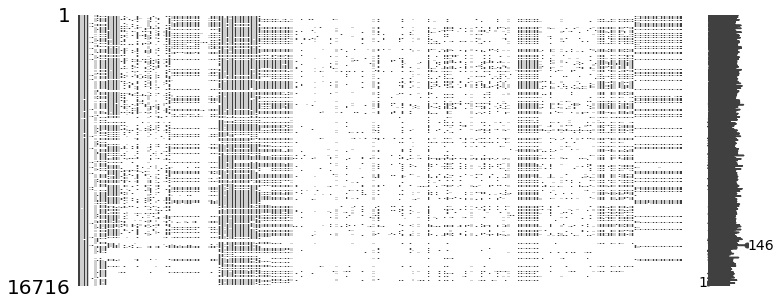

In [11]:
# missingno는 NaN 데이터 시각화
# NaN 데이터 컬럼이 많아 그래프로 파악 어려움
import missingno as msno

msno.matrix(multi_choice_question, figsize=(12,5))

## Survey statistics

- 'GenderSelect' column 사용
- 남성의 비율이 훨씬 높음

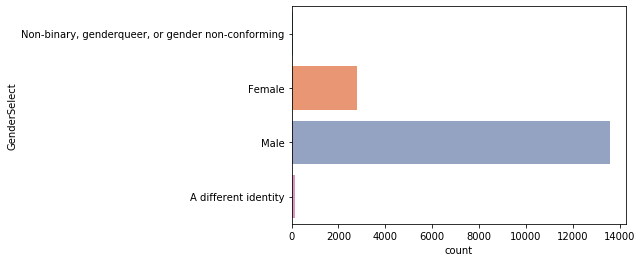

In [16]:
# Gender
# https://seaborn.pydata.org/generated/seaborn.countplot.html
# Show the counts of observations in each categorical bin using bars
# sns.countplot(x, data)
# x: name of variable to count in data
# data: Dataframe, array or list of arrays

# sns.countplot(x='GenderSelect', data=multi_choice_question)
# sns.countplot(y='GenderSelect', data=multi_choice_question)
sns.countplot(y='GenderSelect', data=multi_choice_question, palette='Set2')

In [17]:
# Country
country_df = pd.DataFrame(multi_choice_question['Country'].value_counts())
country_df['국가'] = country_df.index
country_df.columns = ['응답 수', '국가']
country_df = country_df.reset_index().drop('index', axis=1)
print(country_df)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html
num_distinct_country = multi_choice_question['Country'].dropna().nunique()
print("Number of countries: {}".format(num_distinct_country))

    응답 수                           국가
0   4197                United States
1   2704                        India
2   1023                        Other
3    578                       Russia
4    535               United Kingdom
5    471  People 's Republic of China
6    465                       Brazil
7    460                      Germany
8    442                       France
9    440                       Canada
10   421                    Australia
11   320                        Spain
12   277                        Japan
13   254                       Taiwan
14   238                        Italy
15   205                  Netherlands
16   196                      Ukraine
17   194                  South Korea
18   184                    Singapore
19   184                       Poland
20   161                     Pakistan
21   144                       Turkey
22   131                    Indonesia
23   129                  Switzerland
24   127                 South Africa
25   126    

In [18]:
# Age
multi_choice_question['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

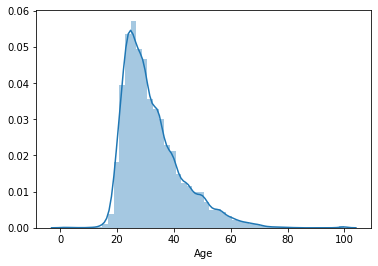

In [19]:
# https://seaborn.pydata.org/generated/seaborn.distplot.html
sns.distplot(multi_choice_question[multi_choice_question['Age'] > 0]['Age'])

Master's degree                                                      6273
Bachelor's degree                                                    4811
Doctoral degree                                                      2347
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64


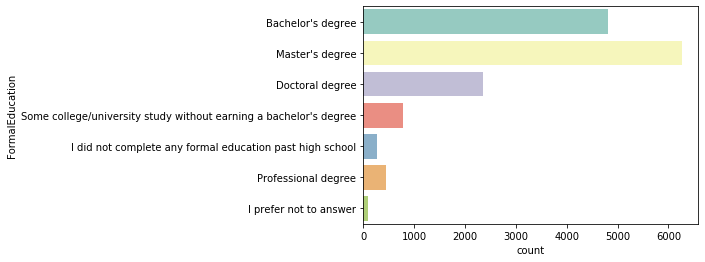

In [21]:
# 학력
print(multi_choice_question['FormalEducation'].value_counts())
sns.countplot(y='FormalEducation', data=multi_choice_question, palette='Set3')

In [22]:
# Major

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html
# Return a Series containing counts of unique values.
# The resulting object will be in descending order 
# so that the first element is the most frequently-occurring element.
major_count = pd.DataFrame(multi_choice_question['MajorSelect'].value_counts())
major_percent = pd.DataFrame(multi_choice_question['MajorSelect'].value_counts(normalize=True))

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
# https://datascienceschool.net/view-notebook/7002e92653434bc88c8c026c3449d27b/
major_df = major_count.merge(major_percent, left_index=True, right_index=True)
major_df.columns = ['응답 수', '비율']
major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


Computer Science                                                4397
Mathematics or statistics                                       2220
Engineering (non-computer focused)                              1339
Electrical Engineering                                          1303
Other                                                            848
Physics                                                          830
Information technology, networking, or system administration     693
A social science                                                 531
Biology                                                          274
Management information systems                                   237
A humanities discipline                                          198
A health science                                                 152
Psychology                                                       137
I never declared a major                                          65
Fine arts or performing arts      

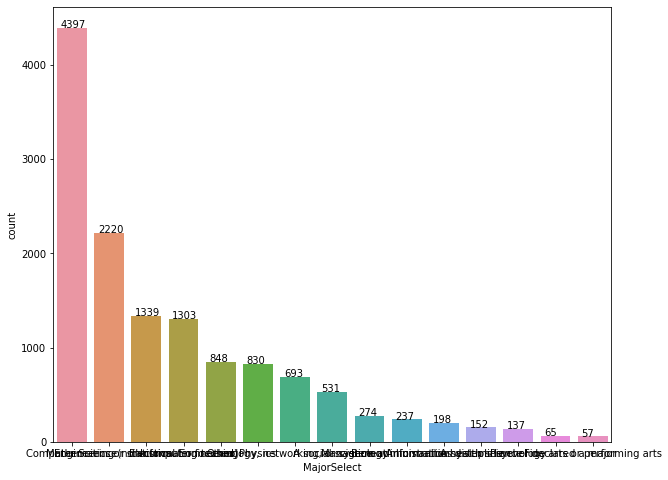

In [40]:
# 전공별 카운트 using countplot
plt.figure(figsize=(10,8))
print(multi_choice_question['MajorSelect'].value_counts())

# how to add data Labels to seaborn countplot / factorplot
# https://stackoverflow.com/questions/49044131/how-to-add-data-labels-to-seaborn-countplot-factorplot
# https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies

ax = sns.countplot(multi_choice_question['MajorSelect'],
              order=multi_choice_question['MajorSelect'].value_counts().index)

for p, label in zip(ax.patches, multi_choice_question['MajorSelect'].value_counts()):
    ax.annotate(label, (p.get_x()+0.1, p.get_height()+0.3))

In [51]:
# Employment status
employment_status_count = pd.DataFrame(
    multi_choice_question['EmploymentStatus'].value_counts()
)
employment_status_percent = pd.DataFrame(
    multi_choice_question['EmploymentStatus'].value_counts(normalize=True)
)
employment_total = employment_status_count.merge(
    employment_status_percent, left_index=True, right_index=True
)

employment_total.columns = ['응답 수', '비율']
employment_total

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


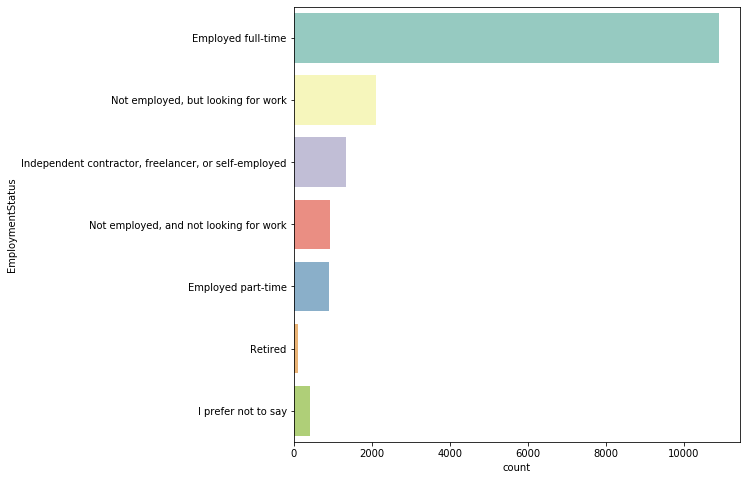

In [49]:
plt.figure(figsize=(8,8))
sns.countplot(y='EmploymentStatus', data=multi_choice_question, palette='Set3')

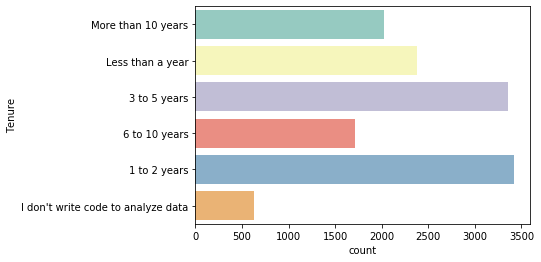

In [52]:
# Tenure
sns.countplot(y='Tenure', data=multi_choice_question, palette='Set3')

### Korean statistics

The number of korea interviewee: 194


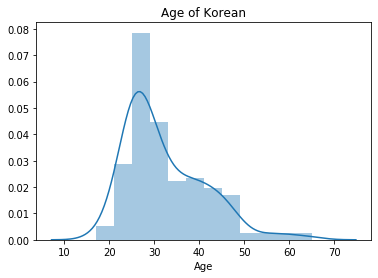

In [57]:
# datafrmae loc indexing use case
# https://www.geeksforgeeks.org/python-pandas-dataframe-loc/
# https://datascienceschool.net/view-notebook/704731b41f794b8ea00768f5b0904512/
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html
# Access a group of rows and columns by label(s) or a boolean array.

korea = multi_choice_question.loc[multi_choice_question['Country'] == 'South Korea'] # indexing using boolean list
print("The number of korea interviewee: {}".format(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('Age of Korean')
plt.show()

In [58]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


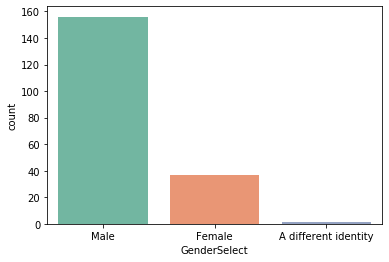

In [60]:
sns.countplot(korea['GenderSelect'], palette='Set2')

Text(0.5, 1.0, 'Korean Female')

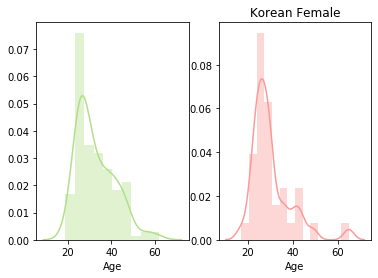

In [75]:
# drawing subplots
figure, (ax1, ax2) = plt.subplots(ncols=2)

# 한국인 중 남성 분포
sns.distplot(korea['Age'].loc[korea['GenderSelect'] == 'Male'].dropna(), ax=ax1,
             color=sns.color_palette("Paired")[2])
plt.title("Korean Male")

# 한국인 중 여성 분포
sns.distplot(korea['Age'].loc[korea['GenderSelect'] == 'Female'].dropna(), ax=ax2,
             color=sns.color_palette("Paired")[4])
plt.title("Korean Female")

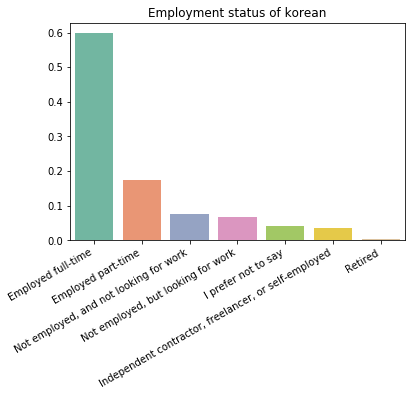

In [64]:
# Employment status of korean
# countplot vs barplot

# Rotating custom tick labels
# https://matplotlib.org/3.1.1/gallery/ticks_and_spines/ticklabels_rotation.html
sns.barplot(x=korea['EmploymentStatus'].unique(), 
            y=korea['EmploymentStatus'].value_counts()/len(korea),
            palette='Set2') # proportion
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of korean')
plt.ylabel('')
plt.show()

Text(0.5, 1.0, 'Korea StudentStatus')

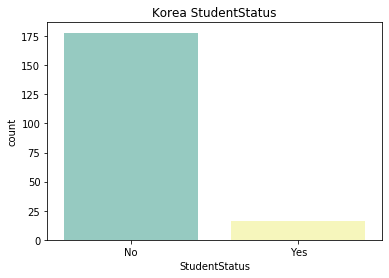

In [78]:
# student or not
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(korea['StudentStatus'], palette='Set3')
plt.title('Korea StudentStatus')

In [81]:
full_time = korea.loc[korea['EmploymentStatus'] == 'Employed full-time']
print(full_time.shape)
looking_for_job = korea.loc[korea['EmploymentStatus'] == 'Not employed, but looking for work']
print(looking_for_job.shape)

(116, 228)
(34, 228)
